In [57]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [15]:
os.chdir('c:\\Users\\Njaal\\OneDrive\\Dokumenter\\Privat\\Njål J. Wiik\\Data analyse\\Data')

In [16]:
# Read the CSV file into a DataFrame: df
df = pd.read_csv("gapminder.csv")
df.head()

,Country,Year,fertility,life,population,child_mortality,gdp,region
0,Afghanistan,1964,7.671,33.639,10474903.0,339.7,1182.0,South Asia
1,Afghanistan,1965,7.671,34.152,10697983.0,334.1,1182.0,South Asia
2,Afghanistan,1966,7.671,34.662,10927724.0,328.7,1168.0,South Asia
3,Afghanistan,1967,7.671,35.170,11163656.0,323.3,1173.0,South Asia
4,Afghanistan,1968,7.671,35.674,11411022.0,318.1,1187.0,South Asia


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10101 entries, 0 to 10100
Data columns (total 8 columns):
Country            10101 non-null object
Year               10101 non-null int64
fertility          10100 non-null float64
life               10101 non-null float64
population         10101 non-null float64
child_mortality    9210 non-null float64
gdp                9000 non-null float64
region             10101 non-null object
dtypes: float64(5), int64(1), object(2)
memory usage: 631.4+ KB


In [39]:
df = df.dropna(subset=['fertility'])

In [40]:
# Create arrays for features and target variable
y = df["life"].values
X_fertility = df["fertility"].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X_fertility.shape))

# Reshape X and y
y = y.reshape(-1,1)
X_fertility = X_fertility.reshape(-1,1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X_fertility.shape))
df.head()

Dimensions of y before reshaping: (10100,)
Dimensions of X before reshaping: (10100,)
Dimensions of y after reshaping: (10100, 1)
Dimensions of X after reshaping: (10100, 1)


,Country,Year,fertility,life,population,child_mortality,gdp,region
0,Afghanistan,1964,7.671,33.639,10474903.0,339.7,1182.0,South Asia
1,Afghanistan,1965,7.671,34.152,10697983.0,334.1,1182.0,South Asia
2,Afghanistan,1966,7.671,34.662,10927724.0,328.7,1168.0,South Asia
3,Afghanistan,1967,7.671,35.170,11163656.0,323.3,1173.0,South Asia
4,Afghanistan,1968,7.671,35.674,11411022.0,318.1,1187.0,South Asia


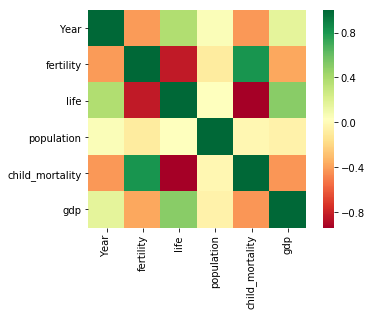

In [41]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

0.6925412523171749


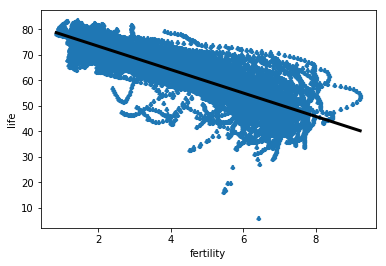

In [55]:
# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
df.plot("fertility","life", kind = "scatter", marker=r'$\clubsuit$')
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

In [58]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_fertility, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.6800191134796232
Root Mean Squared Error: 6.17787658790955
